In [131]:
!pip install bs4
!pip install regex
!pip install nltk
!pip install wordcloud


^C
Traceback (most recent call last):
  File "/home/ilmilanista/anaconda3/bin/pip", line 7, in <module>
    from pip._internal.cli.main import main
  File "/home/ilmilanista/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/ilmilanista/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/ilmilanista/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/home/ilmilanista/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "/home/ilmilanista/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/progress_bars.py", line 12, in <module>
    from pip._internal.util

# Data preprocessing

In [168]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [169]:
import os 
local_path=os.getcwd()
train_path=os.path.join(local_path,'corona_data/Corona_NLP_train.csv')
test_path=os.path.join(local_path,'corona_data/Corona_NLP_test.csv')
train=pd.read_csv(train_path,encoding='ISO-8859-1')
test=pd.read_csv(test_path)

In [170]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [135]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [137]:
data=pd.concat([train,test],axis=0,ignore_index=True)
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [138]:
data.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)

In [139]:
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [140]:
data['Sentiment'].value_counts()

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

In [141]:
dic={"Extremely Negative":1,"Negative":2,"Neutral":3,"Positive":4,"Extremely Positive":5}
data.replace({'Sentiment':dic},inplace=True)

In [142]:
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,advice Talk to your neighbours family to excha...,4
2,Coronavirus Australia: Woolworths to give elde...,4
3,My food stock is not the only one which is emp...,4
4,"Me, ready to go at supermarket during the #COV...",1


In [143]:
data['Sequence_length']=0
for (idx,Value) in enumerate(data.OriginalTweet):
    data['Sequence_length'].iloc[idx]=len(data.loc[idx,'OriginalTweet'].split())

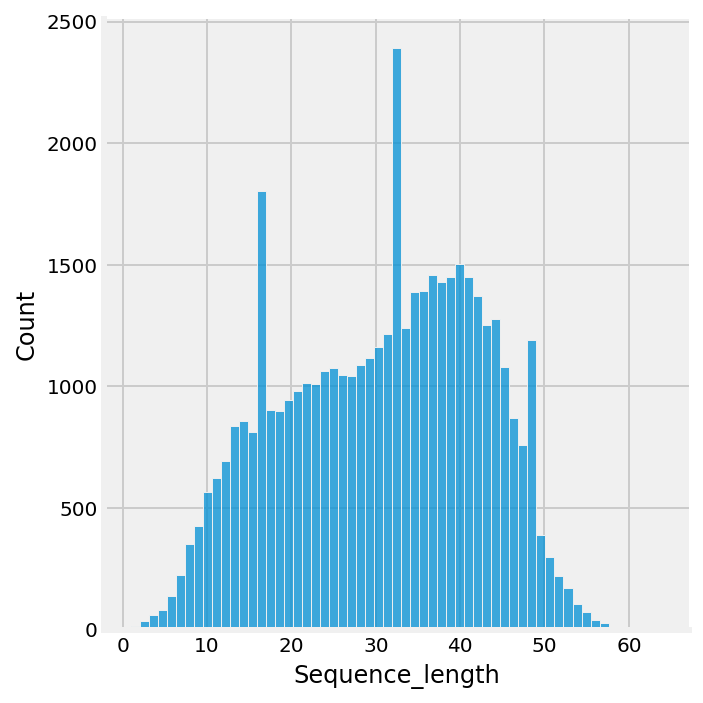

In [144]:
sns.displot(x='Sequence_length',data=data)

In [145]:
data['OriginalTweet'][123] 

'@cgafun @DanielAndrewsMP My daughter is 16, and has stories like that from her friends with supermarket jobs. One of them said "Why do adults act like COVID-19 is my fault?". Or having to stand up to a middle-aged woman who refused to put back 5 boxes of '

In [146]:
re.sub(r'@[A-Za-z0-9]+','',data['OriginalTweet'][123]) #delete mentions (@cgafun)

'  My daughter is 16, and has stories like that from her friends with supermarket jobs. One of them said "Why do adults act like COVID-19 is my fault?". Or having to stand up to a middle-aged woman who refused to put back 5 boxes of '

# enlévement des URL 

In [147]:
data.OriginalTweet[173]

"https://t.co/r9skYbYiHt CALLING SMALL BUSINESSES: Chicago's Department of Business Affairs &amp; Consumer Protection (BACP) is soliciting your feedback to develop resources and measures to support small businesses that have been impacted by COVID-19. Please fill out this survey ASAP."

In [148]:
re.sub(r'http?://[A-Za-z0-9]+','',data['OriginalTweet'][123])

'@cgafun @DanielAndrewsMP My daughter is 16, and has stories like that from her friends with supermarket jobs. One of them said "Why do adults act like COVID-19 is my fault?". Or having to stand up to a middle-aged woman who refused to put back 5 boxes of '

In [149]:
data.OriginalTweet[496] #delete urls

'Clubs shut down\r\r\nBars shut down\r\r\nRestaurants shut down\r\r\nGym shut down \r\r\nGrocery stores are nightmare fuel\r\r\nSeriously if u work at a grocery store or retail in general u have my sympathy \r\r\n#coronavirus'

In [150]:
l=[]
for i,x in enumerate(data.OriginalTweet):
    a=str(x)
    if (a.count('?'))/len(a)>0.3 :
        l.append(i)
        print(x)
        




#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh


#coronavirusinpakistan https://t.co/NBeJJzmdEq




???? ????? ?????? ???????? ???????? ???? ?????? ?? ????? ???????? ????? ??? ????? ????? https://t.co/tOX2GoBkdg

#sindh government spokesman @murtazawahab1 terms #Quarantine facilities at #Taftaan border a joke. Watch the exclusive visuals of criminal negligence ?? https://t.co/wiU7zFbQWx

https://t.co/bjgTQlbzNX



#CoronaVirus #Afghanistan https://t.co/tGF6S2uBfD


????? ???????? ?? #??????? https://t.co/tAoTKN1oxW https://t.co/uNy0xc9Y3N

#coronavirus https://t.co/sO9qDM4ZYS
?? ?????? ??? ????? ?????? ??. ?????? ???? ????? ??????? ?? 2 ??? ????? ?????. ??? ????. @ynetalerts https://t.co/eTyEk4fHK1
????? ? ????? ?? ?????: ??????????? ??? ?? ????????. ? ???????, ??? ? ????? ???? ???? ????? ?????????????? - ???-?? ?? $50 ?? 60. ?????? ??? ????????? ?????? ???????? ????????, ??? ????? ???????? ??? ?????????? ??????. ? ???, ???????, ???? ???????? ? ?????-?? ????? ???????????? ht

In [151]:
len(l)

35

In [152]:
test=data.OriginalTweet[700]
test

"[#DTC #eCommerce]\r\r\nMore people are staying home due to fears of the #coronavirus's spread &amp; the demand for pickup and delivery is accelerating. T\r\r\n\r\r\nU.S. digital groceries hit $23.9 billion in sales in 2018 and were forecast to hit $59.5 billion in 2023.\r\r\nhttps://t.co/fHv3g5v7Pi"

# on doit enlever les hashtag et les nombres

In [153]:
test=re.sub('[^A-Za-z]',' ',test)
test

'  DTC  eCommerce    More people are staying home due to fears of the  coronavirus s spread  amp  the demand for pickup and delivery is accelerating  T      U S  digital groceries hit       billion in sales in      and were forecast to hit       billion in         https   t co fHv g v Pi'

In [154]:
tok=WordPunctTokenizer()
word1=r'@[A-Za-z0-9_]+'
word2=r'https?://[^ ]+'
word=r'|'.join((word1,word2))
link_www=r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
def cleaner(tweet):
    soup=BeautifulSoup(tweet,'lxml')
    soup=soup.get_text()
    clean=re.sub(word,'',soup)
    clean=re.sub(link_www,'',clean)
    clean=clean.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], clean)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()    

In [155]:
%%time
print ("Cleaning and parsing the tweets...\n")
for i,x in enumerate(data.OriginalTweet):
    data.OriginalTweet[i]=cleaner(x)
    if i%5000==0:
        print(i,'Tweet out of 44955 are cleaned \n')
    if i==44954:
        print("cleaning finished")
    

Cleaning and parsing the tweets...

0 Tweet out of 44955 are cleaned 

5000 Tweet out of 44955 are cleaned 

10000 Tweet out of 44955 are cleaned 

15000 Tweet out of 44955 are cleaned 

20000 Tweet out of 44955 are cleaned 

25000 Tweet out of 44955 are cleaned 

30000 Tweet out of 44955 are cleaned 

35000 Tweet out of 44955 are cleaned 

40000 Tweet out of 44955 are cleaned 

cleaning finished
CPU times: user 55.6 s, sys: 582 ms, total: 56.1 s
Wall time: 56.1 s


In [158]:
data.head()

,OriginalTweet,Sentiment,Sequence_length
0,and and,3,8
1,advice talk to your neighbours family to excha...,4,38
2,coronavirus australia woolworths to give elder...,4,14
3,my food stock is not the only one which is emp...,4,42
4,me ready to go at supermarket during the covid...,1,40


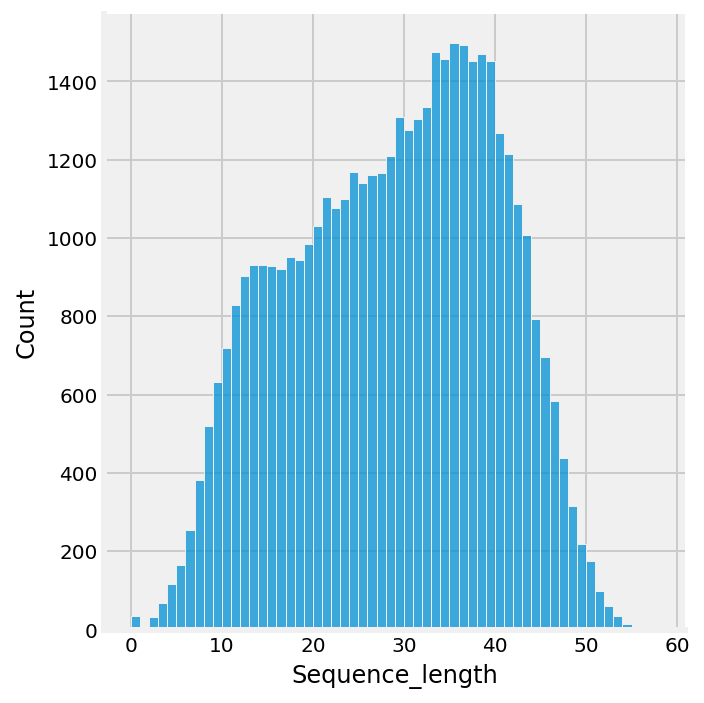

In [159]:
for (idx,Value) in enumerate(data.OriginalTweet):
    data['Sequence_length'].iloc[idx]=len(data.loc[idx,'OriginalTweet'].split())
sns.displot(x='Sequence_length',data=data)

In [161]:
clean=data.loc[(data.Sequence_length<55)&(data.Sequence_length>5)]

In [166]:
clean.to_csv('clean_data.csv')

In [172]:
negative_tweets=data[data.Sentiment<3]
neg_string=[]
for x in negative_tweets.OriginalTweet:
    neg_string.append(x)
neg_string=pd.Series(neg_string).str.cat(sep=' ')#Concatenate strings in the Series/Index with given separator.

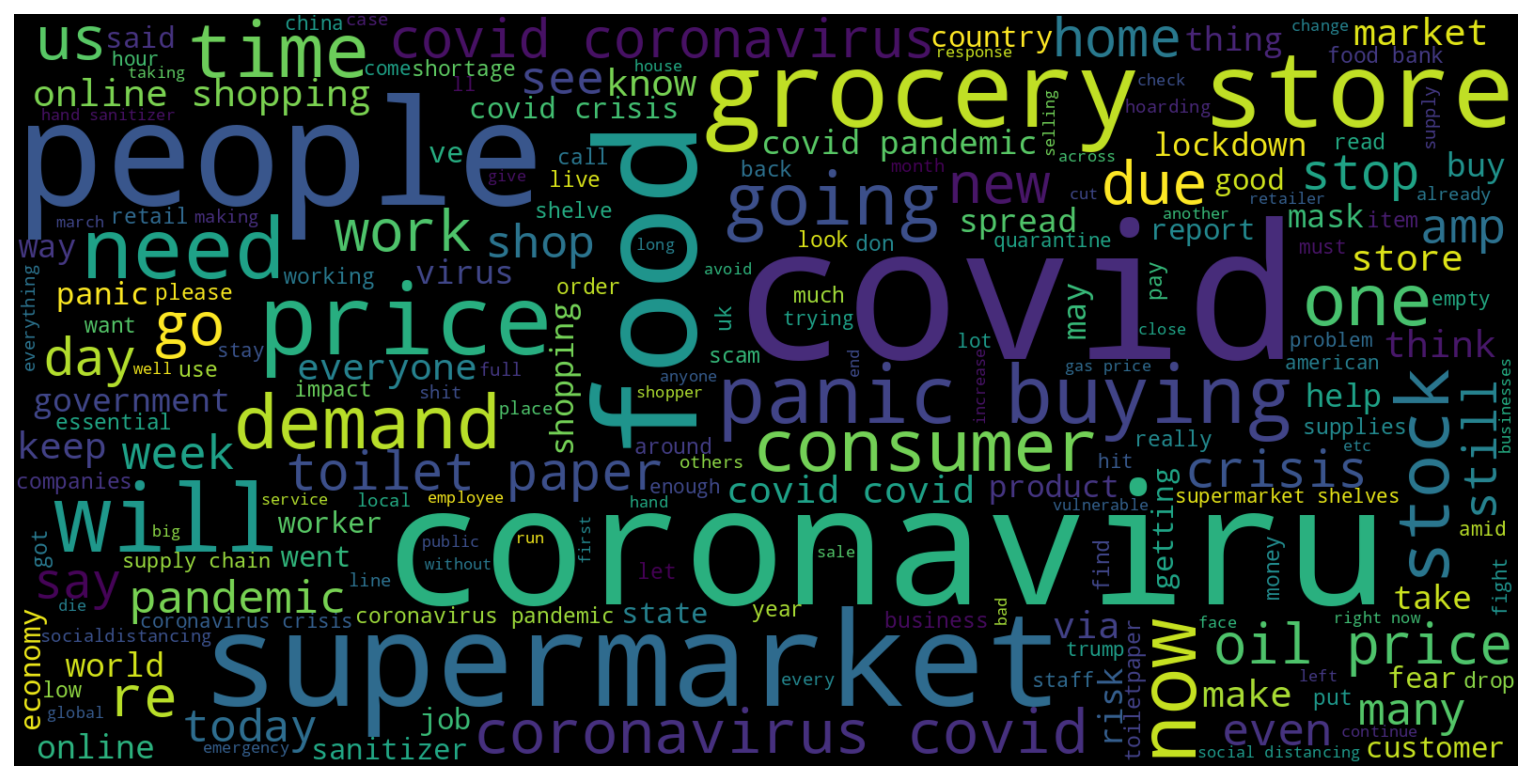

In [173]:
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [174]:
positive_tweets=data[data.Sentiment>2]
pos_string=[]
for x in positive_tweets.OriginalTweet:
    pos_string.append(x)
pos_string=pd.Series(pos_string).str.cat(sep=' ')#Concatenate strings in the Series/Index with given separator.

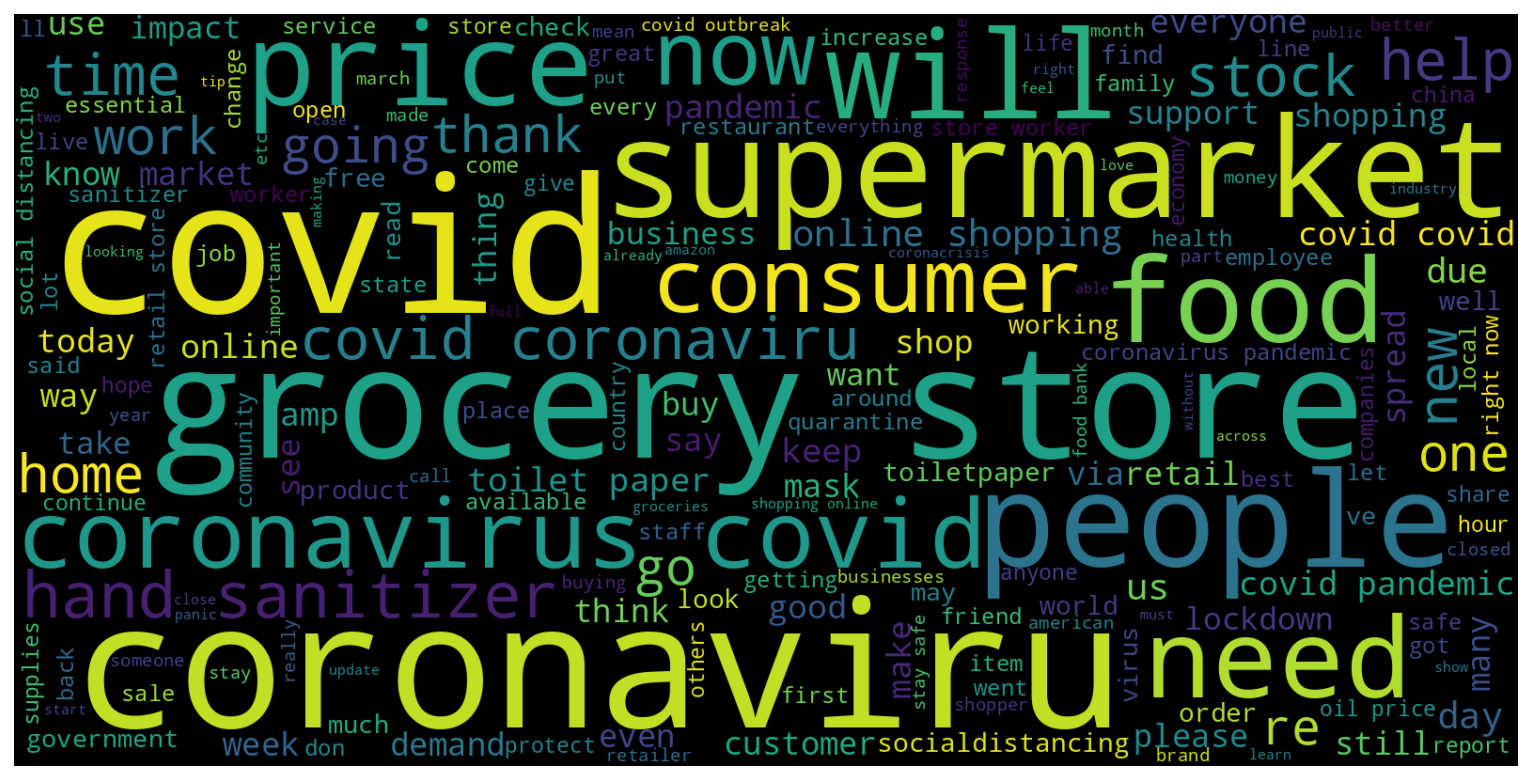

In [175]:
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
del pos_string ,positive_tweets,negations_dic,neg_pattern,negative_tweets,neg_string